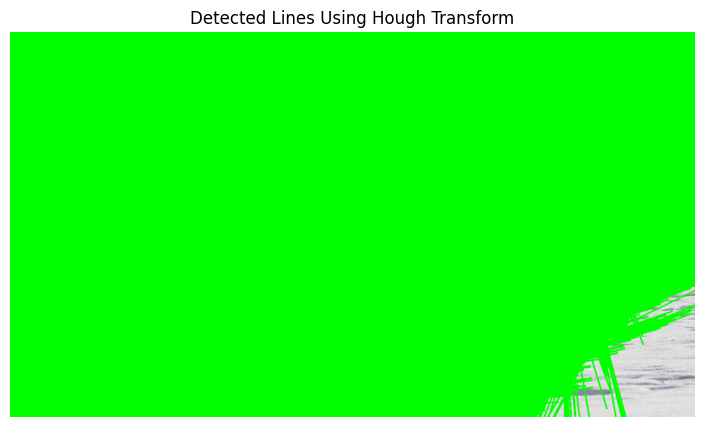

Lines detected and saved as output_lines.jpg


In [1]:
# line_detection_hough_transform.py

import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_lines(input_path, output_path, threshold=100):
    # Read the image
    img = cv2.imread(input_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detector to highlight edges in the image
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Detect lines using the Hough Line Transform
    lines = cv2.HoughLines(edges, rho=1, theta=np.pi / 180, threshold=threshold)

    # Draw the detected lines on the original image
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Save the output image
    cv2.imwrite(output_path, img)

    # Display the result
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Detected Lines Using Hough Transform")
    plt.axis("off")
    plt.show()

# Example usage
if __name__ == "__main__":
    input_path = "input.jpg"  # Input image path
    output_path = "output_lines.jpg"  # Output image path
    detect_lines(input_path, output_path, threshold=100)
    print(f"Lines detected and saved as {output_path}")
